#Active Learning (superintend) on tree leaves .ipynb

Regarding Active Learn: https://superintendent.readthedocs.io/en/latest/

## Saving the files on personal google drive

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
import pathlib
data_dir = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"
data_dir = pathlib.Path(data_dir)

In [75]:
## checking the path,
!ls /content/gdrive/MyDrive/trees-bing-Berlin-test12

gdrive_pth = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"

'ACER leaves'	   'CORYLUS leaves'    'PLATANUS leaves'  'ROBINIA leaves'
'AESCULUS leaves'  'CRATAEGUS leaves'  'POPULUS leaves'   'SORBUS leaves'
'BETULA leaves'    'Fagus leaves'      'PRUNUS leaves'	  'TILIA leaves'
'CARPINUS leaves'  'FRAXINUS leaves'   'QUERCUS leaves'   'ULMUS leaves'


### Dataset cleaning

In [76]:
### cheaking if all images are all jpeg ??

import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  ACER leaves
processing class directory  AESCULUS leaves
processing class directory  BETULA leaves
processing class directory  CARPINUS leaves
processing class directory  CORYLUS leaves
processing class directory  CRATAEGUS leaves
processing class directory  FRAXINUS leaves
processing class directory  PLATANUS leaves
processing class directory  POPULUS leaves
processing class directory  PRUNUS leaves
processing class directory  QUERCUS leaves
processing class directory  ROBINIA leaves
processing class directory  SORBUS leaves
processing class directory  TILIA leaves
processing class directory  ULMUS leaves
processing class directory  Fagus leaves
 no improper image files were found


######Achive: I found 2 files so i manually fixed them however, there maybe a chance to automate this in the future (written by:Hany date: 13-07-2022)

### Generate the NN

- using keras as main engine 

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### Minor error ( ignored for now)

In [78]:
### error & mismatch in names- removing of leaves in the Dset is reqiured (later)--- for now i will revert back to leaves 
berlin_trees = ['ACER leaves', 'AESCULUS leaves','BETULA leaves', 'CARPINUS leaves', 'CORYLUS leaves','CRATAEGUS leaves','FRAXINUS leaves','PLATANUS leaves','POPULUS leaves', 'PRUNUS leaves','QUERCUS leaves','ROBINIA leaves','SORBUS leaves','TILIA leaves', 'ULMUS leaves', 'Fagus leaves']
#berlin_species= ['ACER ', 'AESCULUS ','BETULA ', 'CARPINUS ', 'CORYLUS ','CRATAEGUS ','FRAXINUS ','PLATANUS ','POPULUS ', 'PRUNUS ','QUERCUS ','ROBINIA ','SORBUS ','TILIA ', 'ULMUS ', 'Fagus ']

In [79]:
### Dataset building ###

args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "seed": 4,
    "validation_split": .25,
    "class_names": berlin_trees
}

### Model building 

In [80]:
train = tf.keras.utils.image_dataset_from_directory(
    gdrive_pth,
    color_mode='rgb',
    shuffle =True,
    batch_size=16, ### chaged patch size for better training ( need varification )
    #image_size=(256, 256)  ---- not needed now ----
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  gdrive_pth,
  color_mode='rgb',
  shuffle =True,
  batch_size=16,
  subset="validation",
    **args
)

Found 817 files belonging to 16 classes.
Using 613 files for training.
Found 817 files belonging to 16 classes.
Using 204 files for validation.


In [81]:
### no in the mini-patch 
print(len(train))
len(test)

39


13

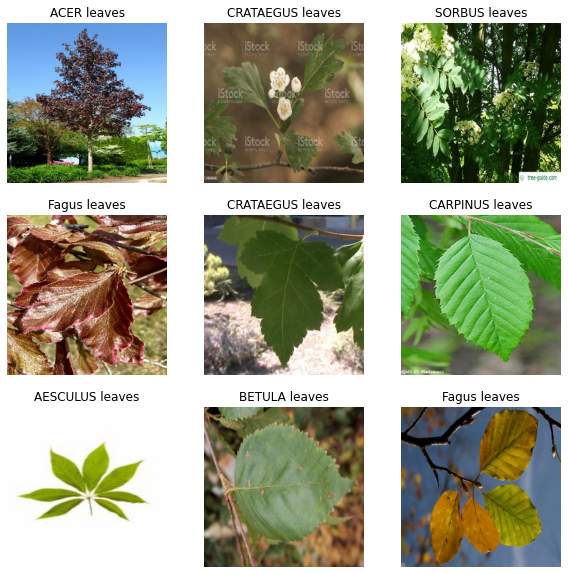

In [82]:
### checking some images 

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        f = np.argmax(labels[i])
        plt.title(berlin_trees[f])
        plt.axis("off")

In [83]:
#for image_batch, labels_batch in train:
 #print(image_batch.shape)
 #print(labels_batch.shape)
 #break

## (optional): Active learning 

for better results we thought to implement active labeling of the dataset
this is done in 2 stages:

- getting the data to be labeled
- store it 
this is done by relabling the data on a sample number from the original dataset
- re-train the model on the labeled data [on step 5](https://colab.research.google.com/drive/19oaWKU-4LV409M2fAWPgOI_ym8D-TM9p?usp=sharing) 


### Basic package install 

In [84]:
!pip install superintendent
!jupyter nbextension enable --py --sys-prefix ipyevents
!pip install superintendent[tests,examples]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension ipyevents/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
from keras.preprocessing.image import load_img
import warnings

### making the widget

how to apply the Active learning ?? (what to re-lablel)
- relablel the Dataset (## done ##)- we tested only 10 


relabeling (ACER leaves)-- temp solution untill we decide the best approch




In [65]:
trees = list(data_dir.glob('ACER leaves/*'))

## example on icluding 2 images in a string array 
#img=Image.open(str(trees[2]))
#img1=Image.open(str(trees[5]))
#np_img = np.array([img,img1])

In [66]:
## creating a loop for all images inside the folder 
y= np.array([np.array(load_img(images)) for images in trees],dtype=object)

In [67]:
#### an idea to fix the black images because np arrays didnt work well with superindent  --- other ideas is using enumerate but not now   
lib_len = len(trees)
list_ofImge=[]
i=0
while i < lib_len:
  b= Image.fromarray(y[i].astype('uint8'), 'RGB')
  list_ofImge.append(b)
  i=i+1
#list_ofImge

In [68]:
print(len(list_ofImge))
list_toLabel= np.array(list_ofImge,dtype=object)
print(list_toLabel.shape)

51
(51,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  


In [93]:
from superintendent import ClassLabeller
no_toLabel= 12
data_toLabel = list_toLabel
widget = ClassLabeller.from_images(
    features=data_toLabel[:no_toLabel, ...],
    canvas_size=(200, 200),
    options=berlin_trees
    
)
widget

ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

### saving the relabled data as a string


todo write a test (output)

In [94]:
widget.new_labels

['ACER leaves',
 'ACER leaves',
 'ACER leaves',
 'CARPINUS leaves',
 'ROBINIA leaves',
 'ACER leaves',
 'ACER leaves',
 'ACER leaves',
 'ACER leaves',
 'BETULA leaves',
 'ACER leaves',
 'TILIA leaves']

her you can see the new labels that are incoperted in the new dataset to be reöabed and then re-trained 